## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing Single Image from test set

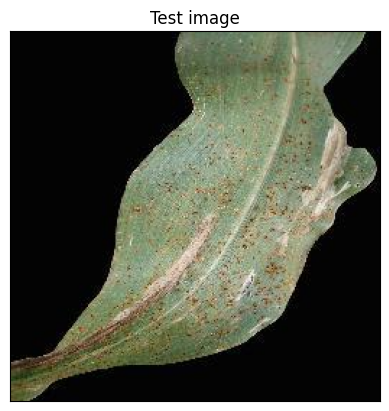

In [21]:
import cv2
image_path = "test/CornCommonRust1.JPG"
# Reading the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr image to rgb image

# Displaying image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [22]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])   #convert single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [23]:
prediction = model.predict(input_arr)
print(prediction,prediction.shape)

1/1 [==============================] - 0s 79ms/step
[[4.7504009e-13 2.8463207e-14 1.7797753e-11 3.6126121e-13 8.6807844e-12
  3.8985820e-12 5.3005343e-14 6.5649309e-13 9.9983644e-01 1.4864857e-14
  6.6358530e-11 2.9923106e-17 2.5974647e-17 7.6344899e-17 7.5696222e-16
  1.8816451e-13 1.3941905e-15 1.0426083e-15 4.2011314e-13 6.8794150e-12
  7.6779728e-11 5.3741940e-19 6.7382074e-14 4.9468286e-17 5.2978678e-17
  5.3969877e-15 9.0735301e-14 8.9540895e-19 2.9424853e-15 4.8341934e-12
  1.6353205e-04 3.0603500e-14 2.7437616e-14 5.8276043e-19 1.5321937e-16
  3.0017900e-16 3.6944148e-19 2.3371835e-14]] (1, 38)


In [24]:
result_index = np.argmax(prediction)
print(result_index)

8


In [25]:
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


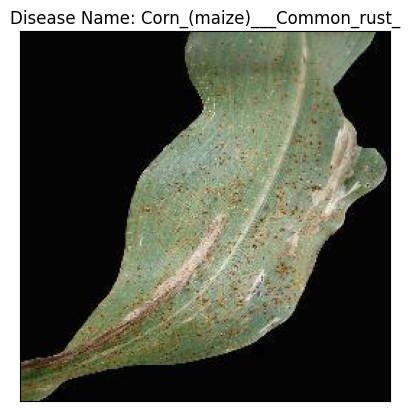

In [26]:
# Displaying result of the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model_prediction

'Corn_(maize)___Common_rust_'